In [35]:
#
# ローソク足チャートを描く
#
%matplotlib inline
import datetime
import pymongo
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.finance as mf
from matplotlib.dates import date2num

In [36]:
client = pymongo.MongoClient('mongodb://ec2-13-115-245-75.ap-northeast-1.compute.amazonaws.com:27017/bitflyer')
#client = pymongo.MongoClient('mongodb://localhost:27017/bitflyer')
db = client.bitflyer
#co = db.lightning_executions_FX_BTC_JPY_OHLC_300
#co = db.lightning_executions_FX_BTC_JPY_OHLC_3600
co = db.lightning_executions_FX_BTC_JPY_OHLC_86400

In [37]:
date=[]
quote = []
volume_sell = []
volume_buy = []
volume_diff = []

#open_dateがafter以降のデータ
#after = datetime.datetime(2017,6,11)
#for data in co.find({'open_date':{'$gte':after}}).sort('id',1):

#直近のデータ100件
count = 100
for data in co.find({}).skip(co.count() - count).sort('id',1):
    t = data['open_date']
    date.append(t)
    quote.append((date2num(t), data['open_price'], data['close_price'], data['high_price'], data['low_price']))
    volume_sell.append(data['volume_sell'])
    volume_buy.append(data['volume_buy'])
    volume_diff.append(data['volume_buy']-data['volume_sell'])

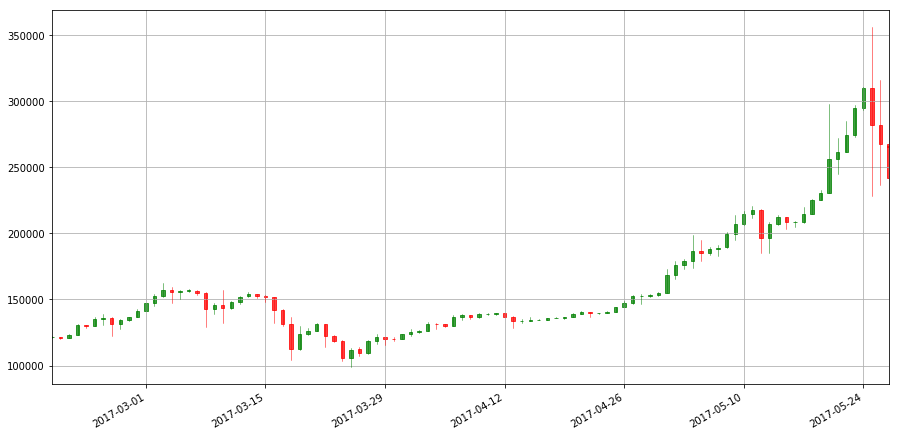

100

In [42]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
ax.grid()
ax.set_xlim(date[0], date[-1])
mf.candlestick_ochl(ax, quote, width=(0.4), colorup='g', colordown='r', alpha=0.75)
fig.autofmt_xdate()
plt.show()
len(date)

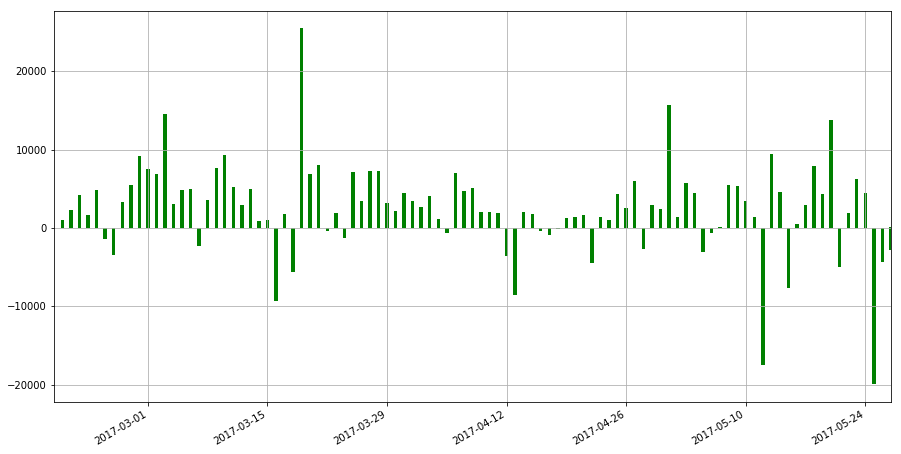

In [44]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111)
ax.grid()
ax.set_xlim(date[0], date[-1])
ax.bar(date, volume_diff, width=(0.4), color='g')
fig.autofmt_xdate()

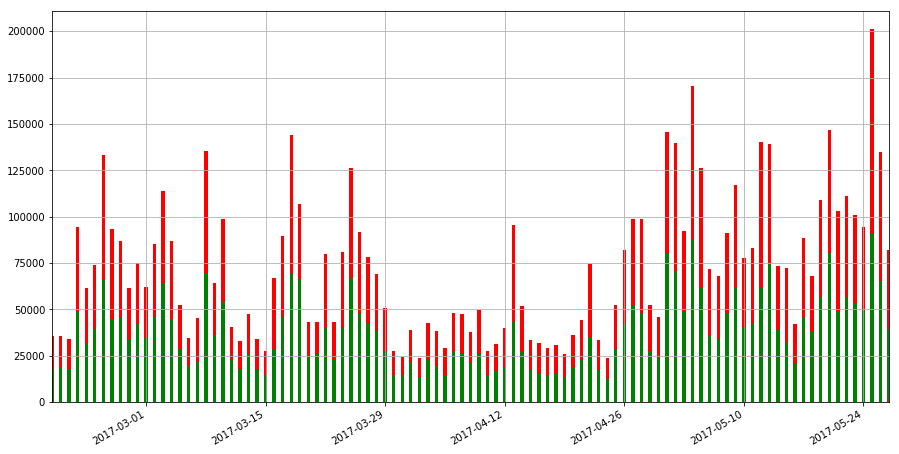

In [46]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111)
ax.grid()
ax.set_xlim(date[0], date[-1])
ax.bar(date, volume_buy, width=(0.4), color='g')
ax.bar(date, volume_sell, bottom=volume_buy, width=(0.4), color='r')
fig.autofmt_xdate()